<a href="https://colab.research.google.com/github/sha-doow/ML/blob/main/NN_on_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload the dataset file from your local machine
uploaded = files.upload()

Saving XOR1.csv to XOR1.csv


In [ ]:
import io

# Read the uploaded file into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['XOR1.csv']))

In [ ]:
df

,X0,X1,XOR
0,-0.234338,0.963147,1
1,0.854222,-0.050064,1
2,-0.330433,1.019271,1
3,1.016932,0.803798,0
4,0.013446,0.125349,0
...,...,...,...
995,0.047808,-0.058215,0
996,0.723450,0.747910,0
997,1.178838,-0.051199,1
998,-0.102950,0.098395,0


In [ ]:
X = df[["X0", "X1"]].values
y = df["XOR"].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=1, shuffle=True, stratify=y
)

In [ ]:
X_train,X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=1, stratify=y_train
)

In [ ]:
print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Training size: (765, 2)
Validation size: (85, 2)
Test size: (150, 2)


In [ ]:
import numpy as np

print("Training labels:", np.bincount(y_train))
print("Validation labels:", np.bincount(y_val))
print("Test labels:", np.bincount(y_test))

Training labels: [376 389]
Validation labels: [42 43]
Test labels: [74 76]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


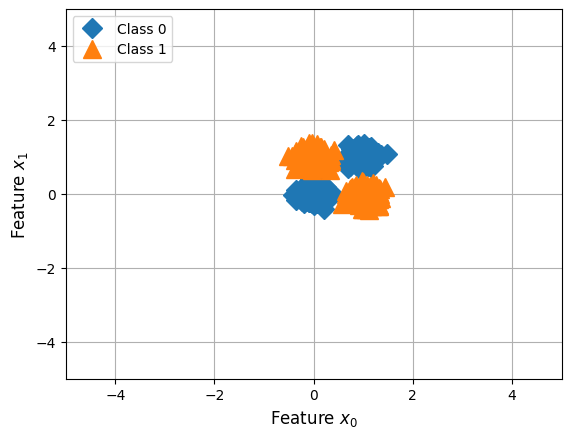

In [ ]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0"
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_0$", fontsize=12)
plt.ylabel("Feature $x_1$", fontsize=12)

plt.grid()
plt.show()

In [ ]:
import torch


class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(

            # 1st hidden layer
            torch.nn.Linear(num_features, 25),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(25, 15),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(15, num_classes),
        )

    def forward(self, x):
        logits = self.all_layers(x)
        return logits

In [ ]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, X, y):

        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]
        return x, y

    def __len__(self):
        return self.labels.shape[0]


train_ds = MyDataset(X_train, y_train)
val_ds = MyDataset(X_val, y_val)
test_ds = MyDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_ds,
    batch_size=32,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=32,
    shuffle=False,
)

In [ ]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.inference_mode(): # basically the same as torch.no_grad
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [ ]:
import torch.nn.functional as F


torch.manual_seed(1)
model = PyTorchMLP(num_features=2, num_classes=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # Stochastic gradient descent

num_epochs = 10

for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels) # Loss function

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")

Epoch: 001/010 | Batch 000/024 | Train/Val Loss: 0.69
Epoch: 001/010 | Batch 001/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 002/024 | Train/Val Loss: 0.70
Epoch: 001/010 | Batch 003/024 | Train/Val Loss: 0.70
Epoch: 001/010 | Batch 004/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 005/024 | Train/Val Loss: 0.69
Epoch: 001/010 | Batch 006/024 | Train/Val Loss: 0.70
Epoch: 001/010 | Batch 007/024 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 008/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 009/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 010/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 011/024 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 012/024 | Train/Val Loss: 0.69
Epoch: 001/010 | Batch 013/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 014/024 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 015/024 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 016/024 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 017/024 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 018/0

In [ ]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 99.74%
Val Acc 98.82%
Test Acc 100.00%


In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('D', '^', 'x', 's', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits = classifier.forward(tensor)
    Z = np.argmax(logits.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    #edgecolor='black',
                    marker=markers[idx],
                    label=cl)

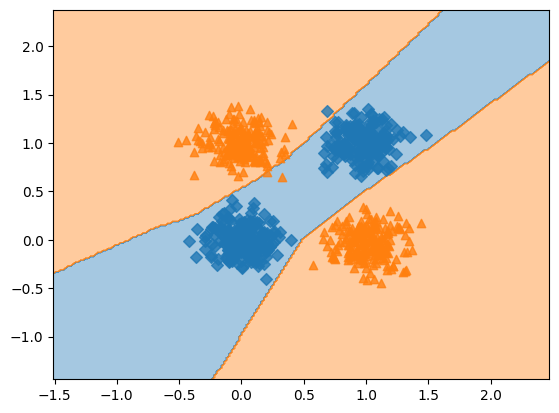

In [ ]:
plot_decision_regions(X_train, y_train, classifier=model)